In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import io

# Loading in data + discovery

In [2]:
raiders_data = pd.read_csv("raiders.csv")
rams_data = pd.read_csv('rams.csv')
chargers_data = pd.read_csv('chargers.csv')

In [3]:
# examining data
raiders_data = pd.DataFrame(raiders_data)
raiders_data.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Points,Points.1,...,Def Rank.1,Overall Rank,Overall Rank.1,Overall Rank.2,Overall Rank.3,Simple Rating System,Simple Rating System.1,Simple Rating System.2,Simple Rating System.3,Simple Rating System.4
0,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,...,Yds,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,NFL,Los Angeles Raiders,9,7,0,3rd of 5,NaN,303,327,...,10,22,15,14,28,-1.5,-0.1,-1.6,-1.9,0.3
3,1993,NFL,Los Angeles Raiders*,10,6,0,2nd of 5,Lost Div,306,326,...,9,18,18,10,28,-1.3,0.6,-0.7,1.1,-1.7
4,1992,NFL,Los Angeles Raiders,7,9,0,4th of 5,NaN,249,281,...,9,28,15,14,28,-2.0,0.4,-1.6,-3.2,1.5


In [4]:
# Getting first (0th) row of the "Unnamed: 0" col
raiders_data.loc[0, 'Unnamed: 0']

'Year'

All the NFL data has corrupted column names and corrupted first row values as a result

# Fixing and Aggregating NFL datasets

## Fixing Column Names


In [5]:
# range function specifies the amount of time to run the loop for col number
for i in range(raiders_data.shape[1]):
    col = raiders_data.columns[i]
    if col[0:5] == "Unnam":
        raiders_data.rename(columns = {col: raiders_data.loc[0,col]}, inplace = True)
    else:
        raiders_data.rename(columns = {col: col + " " + raiders_data.loc[0,col]}, inplace = True)

# getting rid of the first 2 rows
raiders_data.drop([raiders_data.index[0], raiders_data.index[1]], inplace = True)

raiders_data.head(5)

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,Points PF,Points.1 PA,...,Def Rank.1 Yds,Overall Rank T/G,Overall Rank.1 Pts±,Overall Rank.2 Yds±,Overall Rank.3 out of,Simple Rating System MoV,Simple Rating System.1 SoS,Simple Rating System.2 SRS,Simple Rating System.3 OSRS,Simple Rating System.4 DSRS
2,1994,NFL,Los Angeles Raiders,9,7,0,3rd of 5,NaN,303,327,...,10,22,15,14,28,-1.5,-0.1,-1.6,-1.9,0.3
3,1993,NFL,Los Angeles Raiders*,10,6,0,2nd of 5,Lost Div,306,326,...,9,18,18,10,28,-1.3,0.6,-0.7,1.1,-1.7
4,1992,NFL,Los Angeles Raiders,7,9,0,4th of 5,NaN,249,281,...,9,28,15,14,28,-2.0,0.4,-1.6,-3.2,1.5
5,1991,NFL,Los Angeles Raiders*,9,7,0,3rd of 5,Lost WC,298,297,...,21,11,15,24,28,0.1,1.3,1.4,0.3,1.1
6,1990,NFL,Los Angeles Raiders*,12,4,0,1st of 5,Lost Conf,337,268,...,4,14,9,13,28,4.3,2.2,6.6,2.2,4.4


## Creating a column_fixer function

In [6]:
def column_fixer(data):
    # range function specifies the amount of time to run the loop for col number
    for i in range(data.shape[1]):
        col = data.columns[i]
        if col[0:5] == "Unnam":
            data.rename(columns = {col: data.loc[0,col]}, inplace = True)
        else:
            data.rename(columns = {col: col + " " + data.loc[0,col]}, inplace = True)

    # getting rid of the first 2 rows
    data.drop([data.index[0], data.index[1]], inplace = True)

In [7]:
# applying function to other NFL datasets
column_fixer(chargers_data)
column_fixer(rams_data)

In [8]:
chargers_data.head(5)

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,Points PF,Points.1 PA,...,Def Rank.1 Yds,Overall Rank T/G,Overall Rank.1 Pts±,Overall Rank.2 Yds±,Overall Rank.3 out of,Simple Rating System MoV,Simple Rating System.1 SoS,Simple Rating System.2 SRS,Simple Rating System.3 OSRS,Simple Rating System.4 DSRS
2,2022,NFL,Los Angeles Chargers,2,2,0,2nd of 4,NaN,92,108,...,20,8,22,11,32,-4.0,-0.7,-4.7,-5.6,0.9
3,2021,NFL,Los Angeles Chargers,9,8,0,3rd of 4,NaN,474,459,...,23,19,16,9,32,0.9,0.2,1.1,5.3,-4.2
4,2020,NFL,Los Angeles Chargers,7,9,0,3rd of 4,NaN,384,426,...,10,13,20,9,32,-2.6,-0.3,-2.9,-1.0,-2.0
5,2019,NFL,Los Angeles Chargers,5,11,0,4th of 4,NaN,337,345,...,6,31,16,5,32,-0.5,-0.8,-1.3,-1.6,0.3
6,2018,NFL,Los Angeles Chargers*,12,4,0,2nd of 4,Lost Div,428,329,...,9,15,7,6,32,6.2,-0.2,6.0,3.0,2.9


In [9]:
rams_data.head(5)

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,Points PF,Points.1 PA,...,Def Rank.1 Yds,Overall Rank T/G,Overall Rank.1 Pts±,Overall Rank.2 Yds±,Overall Rank.3 out of,Simple Rating System MoV,Simple Rating System.1 SoS,Simple Rating System.2 SRS,Simple Rating System.3 OSRS,Simple Rating System.4 DSRS
2,2021,NFL,Los Angeles Rams*,12,5,0,1st of 4,Won SB,460,372,...,17,13,6,12,32,5.2,0.1,5.3,4.2,1.1
3,2020,NFL,Los Angeles Rams*,10,6,0,2nd of 4,Lost Div,372,296,...,1,21,10,1,32,4.8,0.7,5.4,-0.8,6.2
4,2019,NFL,Los Angeles Rams,9,7,0,3rd of 4,NaN,394,364,...,13,15,12,8,32,1.9,2.0,3.9,2.2,1.7
5,2018,NFL,Los Angeles Rams*,13,3,0,1st of 4,Lost SB,527,384,...,19,4,3,3,32,8.9,-0.4,8.5,9.5,-1.1
6,2017,NFL,Los Angeles Rams*,11,5,0,1st of 4,Lost WC,478,329,...,19,9,3,10,32,9.3,-0.2,9.2,8.2,1.0


In [41]:
if rams_data.loc[80, 'Tm'][0:6] != 'Los An':
    print("IT PROCCED")

IT PROCCED


In [52]:
# Rams data has St. Louis and Cleveland data on it

for row_num in range(rams_data.shape[0]):
# for loop runs for every row since first number off of shape is row
    team_name = rams_data.loc[row_num, 'Tm']
    if team_name :
        print("IT PROCCED")
        #rams_data.drop([rams_data.index[row]])

KeyError: 0

## Aggregating all NFL data together into singular dataframe

In [10]:
# adding 'team' label
raiders_data['Team'] = 'Raiders'
chargers_data['Team'] = 'Chargers'
rams_data['Team'] = 'Rams'

In [11]:
# merging nfl datasets
nfl_data = pd.merge(
    raiders_data, chargers_data, how = 'outer'
)
nfl_data = pd.merge(
    nfl_data, rams_data, how = 'outer'
)

nfl_data.shape

(104, 30)

In [12]:
nfl_data.head(50)

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,Points PF,Points.1 PA,...,Overall Rank T/G,Overall Rank.1 Pts±,Overall Rank.2 Yds±,Overall Rank.3 out of,Simple Rating System MoV,Simple Rating System.1 SoS,Simple Rating System.2 SRS,Simple Rating System.3 OSRS,Simple Rating System.4 DSRS,Team
0,1994,NFL,Los Angeles Raiders,9,7,0,3rd of 5,NaN,303,327,...,22,15,14,28,-1.5,-0.1,-1.6,-1.9,0.3,Raiders
1,1993,NFL,Los Angeles Raiders*,10,6,0,2nd of 5,Lost Div,306,326,...,18,18,10,28,-1.3,0.6,-0.7,1.1,-1.7,Raiders
2,1992,NFL,Los Angeles Raiders,7,9,0,4th of 5,NaN,249,281,...,28,15,14,28,-2.0,0.4,-1.6,-3.2,1.5,Raiders
3,1991,NFL,Los Angeles Raiders*,9,7,0,3rd of 5,Lost WC,298,297,...,11,15,24,28,0.1,1.3,1.4,0.3,1.1,Raiders
4,1990,NFL,Los Angeles Raiders*,12,4,0,1st of 5,Lost Conf,337,268,...,14,9,13,28,4.3,2.2,6.6,2.2,4.4,Raiders
5,1989,NFL,Los Angeles Raiders,8,8,0,3rd of 5,NaN,315,297,...,16,13,16,28,1.1,0.7,1.8,0.0,1.9,Raiders
6,1988,NFL,Los Angeles Raiders,7,9,0,3rd of 5,NaN,325,369,...,12,18,21,28,-2.8,-0.8,-3.6,-0.3,-3.3,Raiders
7,1987,NFL,Los Angeles Raiders,5,10,0,4th of 5,NaN,301,289,...,16,11,3,28,0.8,-0.8,0.0,-1.6,1.7,Raiders
8,1986,NFL,Los Angeles Raiders,8,8,0,4th of 5,NaN,323,346,...,24,18,6,28,-1.4,1.6,0.2,0.0,0.2,Raiders
9,1985,NFL,Los Angeles Raiders*,12,4,0,1st of 5,Lost Div,354,308,...,24,9,5,28,2.9,1.5,4.3,0.7,3.7,Raiders


In [20]:
# exporting nfl_data to csv
nfl_data.to_csv( "nfl_data.csv", index=False, encoding='utf-8-sig')

DataError: No numeric types to aggregate

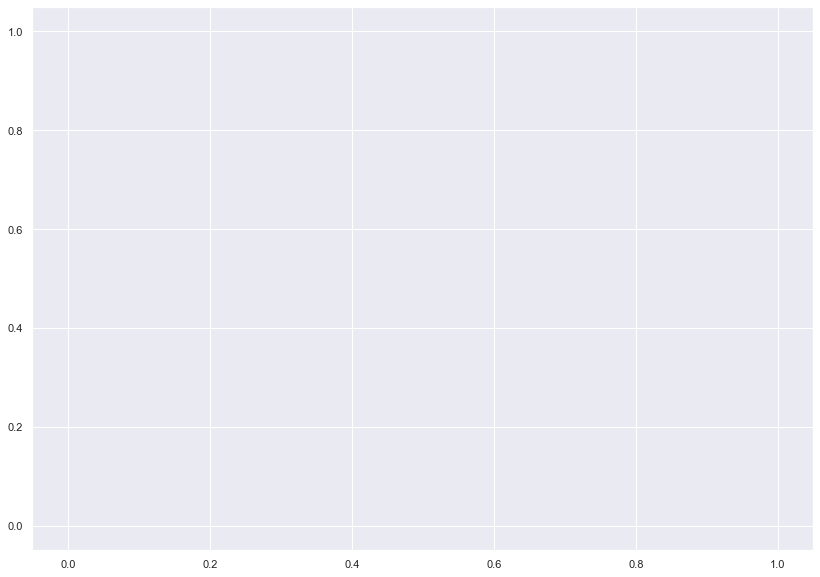

In [22]:
# Setting a large size for future plots (width x height)
sns.set(rc = {'figure.figsize':(14,10)})

la_nfl_wins = sns.lineplot(
    'Year', 'W', data = nfl_data, 
    hue='Team'#, palette = ['blue', 'yellow', 'black']
    ).set_title("LA NFL Teams' Wins Over Time", fontsize=30
)

plt.ylabel('Wins')
plt.xlim(1990, 2021)

# Loading in CFB data

In [14]:
ucla_data = pd.read_csv("ucla.csv")
usc_data = pd.read_csv('usc.csv')

In [15]:
# adding 'team' label
ucla_data['Team'] = 'UCLA'
usc_data['Team'] = 'USC'

In [16]:
# merging ucla & usc datasets
ucla_and_usc = pd.merge(
    ucla_data, usc_data, how = 'outer'
)

ucla_and_usc.shape

(197, 19)

In [17]:
# exporting ucla and usc to csv
ucla_and_usc.to_csv( "ucla_and_usc.csv", index=False, encoding='utf-8-sig')

Text(0, 0.5, 'Wins')

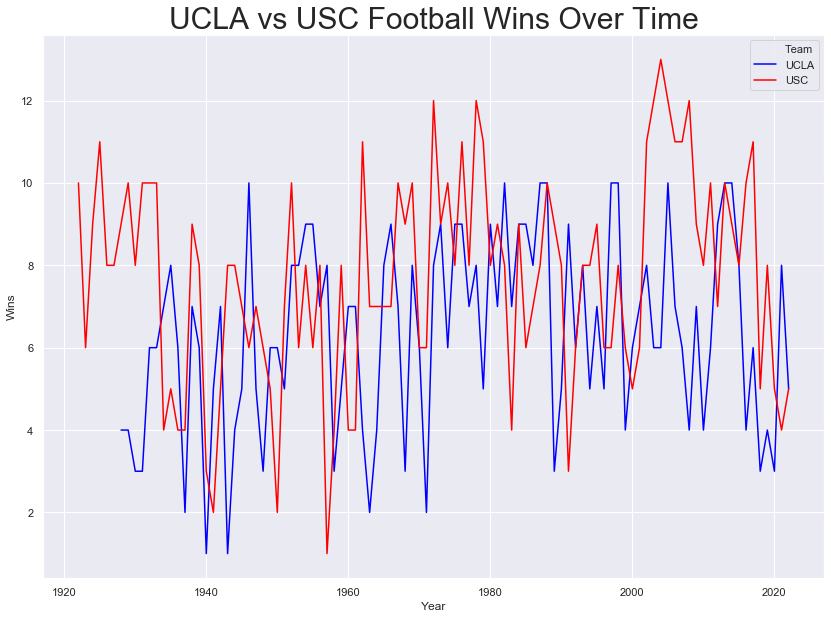

In [21]:
# Setting a large size for future plots (width x height)
sns.set(rc = {'figure.figsize':(14,10)})

usc_vs_ucla_wins = sns.lineplot(
    'Year', 'Overall W', data = ucla_and_usc, 
    hue='Team', palette = ['blue', 'red']
    ).set_title("UCLA vs USC Football Wins Over Time", fontsize=30
)

plt.ylabel('Wins')